## Import all neccesary libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

### below import used for classification evalution

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Read and Clean data

In [4]:
df = pd.read_csv('spam.csv', encoding='latin')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2645,ham,"Sorry, I'll call later",NaN,NaN,NaN
3509,ham,I just saw ron burgundy captaining a party boa...,NaN,NaN,NaN
1728,ham,As per your request 'Maangalyam (Alaipayuthe)'...,NaN,NaN,NaN
74,ham,U can call me now...,NaN,NaN,NaN
4321,ham,Sorry . I will be able to get to you. See you ...,NaN,NaN,NaN


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Delete unnecessary columns and rename columns

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.rename(columns={'v1':'Email Type', 'v2':'Content'},inplace=True)

In [9]:
df.head()

,Email Type,Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Convert email type into binary: ham (0) and spam (1)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
df['Email Type'] = encoder.fit_transform(df['Email Type'])
df.head()

,Email Type,Content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## remove all duplicates in the dataset

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
df['Email Type'].value_counts()

Email Type
0    4516
1     653
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

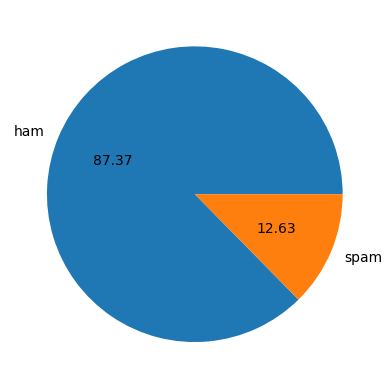

In [19]:
plt.pie(df['Email Type'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

### Preprocessing data before training

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

#### TO-DO
#### - Convert the content into lowercase
#### - Split the sentences into words
#### - Remove all stopwords, punctuation, special chars
#### - Stemming

In [21]:
def preprocessing(content):
    content = str(content)
    content = content.lower()
    content = nltk.word_tokenize(content)

    array = []
    for i in content:
        if i.isalnum():
            array.append(i)
    content = array[:]
    array.clear()
    for i in content:
        if i not in stopwords.words('english') and i not in string.punctuation:
            array.append(i)
    content = array[:]
    array.clear()
    for i in content:
        array.append(ps.stem(i))
    return " ".join(array)

In [22]:
ps = PorterStemmer()
df['preprocessing'] = df['Content'].apply(preprocessing)

In [23]:
df.sample(10)

,Email Type,Content,preprocessing
906,1,"all the lastest from Stereophonics, Marley, Di...",lastest stereophon marley dizze racal libertin...
775,0,Thanks for picking up the trash.,thank pick trash
5242,0,Hmm thinking lor...,hmm think lor
5167,0,Oh did you charge camera,oh charg camera
3328,0,Sac will score big hundred.he is set batsman:-),sac score big set batsman
3131,0,I've been barred from all B and Q stores for l...,bar b q store life twat orang dungere came ask...
5304,0,Pls ask macho how much is budget for bb bold 2...,pl ask macho much budget bb bold 2 co saw new ...
4151,0,What's nannys address?,nanni address
4183,0,I just really need shit before tomorrow and I ...,realli need shit tomorrow know wo awak like 6
1141,1,I don't know u and u don't know me. Send CHAT ...,know u u know send chat 86688 let find rcvd ld...


In [24]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('computing')

'comput'

In [25]:
preprocessing("¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...	")

'çªáüçñ'

### Visualise the extracted features

In [26]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [27]:
ham_wc = wc.generate(df[df['Email Type'] == 0]['preprocessing'].str.cat(sep=" "))

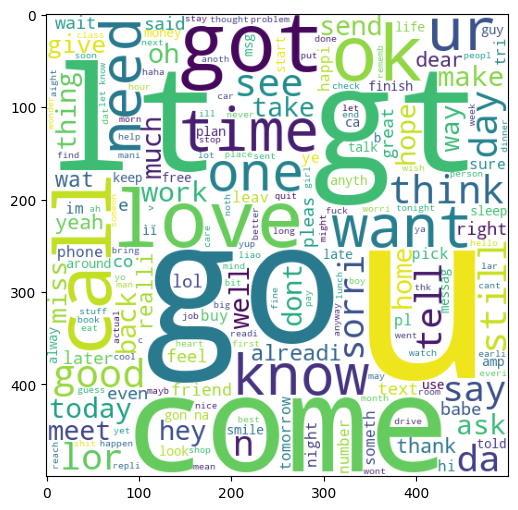

In [28]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [29]:
spam_wc = wc.generate(df[df['Email Type'] == 1]['preprocessing'].str.cat(sep=" "))

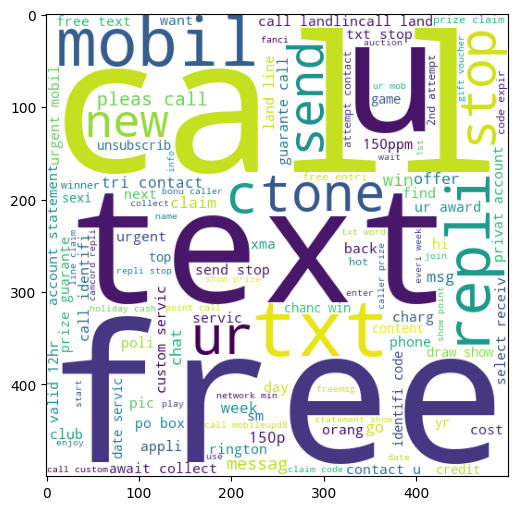

In [30]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Building Model and Training using Naive Bayes

In [32]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [33]:
x = tfidf.fit_transform(df['preprocessing']).toarray()

In [34]:
x.shape

(5169, 3000)

In [35]:
y = df['Email Type'].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [38]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [39]:
## Evaluate using classification

In [40]:
mnb = MultinomialNB()

In [41]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("MultinomialNB")
print("Accuracy: ", accuracy_score(y_test,y_pred2))
print("Precision: ", precision_score(y_test,y_pred2))

MultinomialNB
Accuracy:  0.9709864603481625
Precision:  1.0


### Evaluation of different Naive Bayes technique

In [42]:
gnb = GaussianNB()
bnb = BernoulliNB()

## Evalution of GaussianNB

In [43]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB")
print("Accuracy: ", accuracy_score(y_test,y_pred1))
print("Precision: ", precision_score(y_test,y_pred1))

GaussianNB
Accuracy:  0.8694390715667312
Precision:  0.5068493150684932


## Evaluation of BernouliNB

In [44]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("BernouliNB")
print("Accuracy: ", accuracy_score(y_test,y_pred3))
print("Precision: ", precision_score(y_test,y_pred3))

BernouliNB
Accuracy:  0.9835589941972921
Precision:  0.991869918699187


### Evaluation of Other Classification Algorithms & Improvements

In [45]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [46]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [47]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [48]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [49]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [50]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


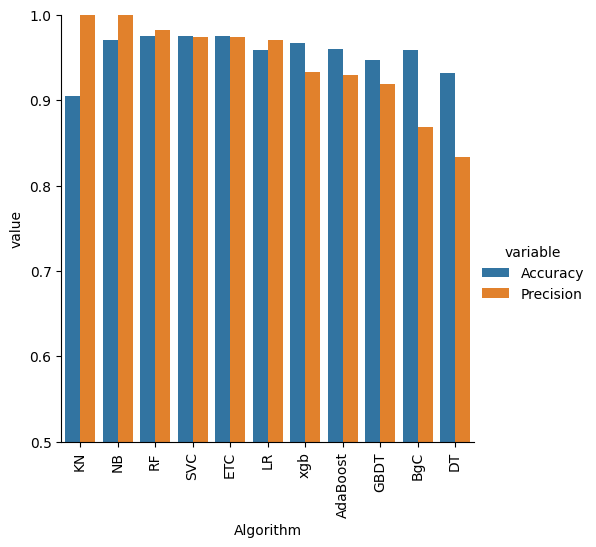

In [51]:
import seaborn as sns
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

In [52]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


## Voting Classifier

In [53]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [54]:
from sklearn.ensemble import VotingClassifier

In [55]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

## Stacking classifier

In [56]:
from sklearn.ensemble import StackingClassifier

In [57]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [58]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [59]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


### Testing (50 samples)

In [62]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [63]:
#### export for later use

In [64]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [65]:
test = pd.read_csv('test.csv', encoding='latin')

In [66]:
test.head()

,Unnamed: 0,Content,isspam
0,1,wlodek zadrozny asks if there is anything inte...,ham
1,2,"hi there,, we offer eleven SYMANNTEC, PC GAMES...",spam
2,3,a graduate student in education approach a col...,ham
3,4,doe anyone out there know the whereabout of dr...,ham
4,5,57 million email addresses for only $ 99 you w...,spam


In [67]:
test.drop(columns=['Unnamed: 0'],inplace=True)

In [68]:
test.head(None)

,Content,isspam
0,wlodek zadrozny asks if there is anything inte...,ham
1,"hi there,, we offer eleven SYMANNTEC, PC GAMES...",spam
2,a graduate student in education approach a col...,ham
3,doe anyone out there know the whereabout of dr...,ham
4,57 million email addresses for only $ 99 you w...,spam
5,a bibliography of work on language and power h...,ham
6,bad credit ? credit ? bankruptcy ? divorce ? j...,spam
7,none of the example mention in john cowan 's r...,ham
8,lin-94 final program clin-94 fifth computation...,ham
9,make $ 3500 per week use your home computer ! ...,spam


In [69]:
test.rename(columns={'isspam':'Correct Type'},inplace=True)

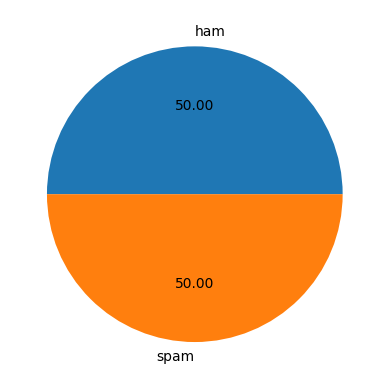

In [70]:
plt.pie(test['Correct Type'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [71]:
def testing(testData):
    # 1. preprocess
    transformed = preprocessing(testData)
    # 2. vectorize
    vector = tfidf.transform([transformed])
    # 3. predict
    result = mnb.predict(vector)[0]
    # 4. display the result
    if result == 1:
        type = "spam"
    else:
        type = "ham"
        
    return type

In [72]:
testing("do n't want to receive these e-mail ? click the follow link to remove your address from our mail list : http : / / capitalfm . com / unsubscribe + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - this be new at http : / / capitalfm . com - smash hits poll winners ' party - we take you backstage on sunday . - the mask of zorro - win great prize in our swashbuckle comp . - christmas contenders - who ' ll be number one this christmas ? - winning lines - guess the lyric and win prize every week . - share a capital christmas - help other londoner at christmas . - video and game offers - all the latest title at great price . - classifieds - find great deal on car and all the best job . + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - + - - smash hits poll winners ' party - we take you backstage on sunday . the year would n't be complete without the smash hits poll winner ' party , and we ' ll be give you special access to all the action as the likes of boyzone , aqua , b * witch and all saint cross their finger . from 3pm on sunday 13th december you can chat live to the star , find out who 's win what , and see our backstage photo of the fun . do n't miss out on the action at : http : / / capitalfm . com - the mask of zorro - win great prize in our swashbuckle comp . there 's something for everyone in the fab new movie that pack in all the sword-fight action and romance you could hope for with antonio bandera and catherine zeta jone as hero and heroine . to celebrate this return to chivalry and gallantry you could win some great zorro prize in our competition , only at : http : / / capitalfm . com - christmas contenders - who ' ll be number one this christmas ? who 's go to be in that covet spot over the festive season ? we ' ve gather all the likely face and want to know who you think will be sit pretty on the most important chart of the year . the field 's wide open and it could be anyone from spice girl to south park so get your vote in at : http : / / capitalfm . com - winning lines - guess the lyric and win prize every week . it sound simple , but it could be nag at you for day . each week we give you a few line from a hit song , and you just have to tell us which it be . sound easy ? then give it a whirl ! this week , if you know enough about music you could be in line to win a fantastic george michael video at : http : / / capitalfm . com - share a capital christmas - help other londoner at christmas . 1998 see the 18th annual share a capital christmas appeal , which aim to make christmas better for those in need . last year 600 , 0 worth of goods be donate and 65 , 0 have a better festive season thanks to your generosity . find out how to help at : http : / / capitalfm . com - video and game offers - all the latest title at great price . as well as the best music , we ' ve gather a fantastic range of the latest video and playstation game for you at amaze price . there 's a selection of new movie from only 6 . 99 and all the hottest game at up to 5 . 0 off . it 's quick and easy to pick up some bargain at : http : / / capitalfm . com - classifieds - find great deal on car and all the best job . if you ' re look for the right car , we ' ve get hundred of thousand of them , searchable by every feature imaginable . if it 's a new job you ' re after , then we also have a huge range of opportunity available , so come on over and check out the classified at : http : / / capitalfm . com _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ advertisement fancy a fantastic compaq presario for christmas ? today be your last chance to enter the competition to win a fully multimedium enable with instant access to the internet , accelerate graphic and dolby digital surround . the competition close tomorrow , so don t miss your chance to win the best christmas present ever ! http : / / capitalfm . com / compaqmtv / _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ advertisement a modem a day let you click , surf and play ! it s true ! 3com us robotic be give away a v . 90 56k modem every day ! powerful enough to access your favourite site faster and more reliably . you want one ? then click the link below for your chance to win today - but hurry , stock be go fast ! http : / / capitalfm . com / 3comusrob / _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ advertisement in a crazy world - keep your head ! it 's new . . . it 's excite . . . it have a rich and creamy head . why ? because it 's brew from barley malt , bb soda be non-alcoholic and make from the finest natural ingredient . you can win a free case of bb soda today by enter the competition . bb - soft drink with a difference . http : / / capitalfm . com / bbsoda /advertisement win free cinema ticket from 14th dec ")

'spam'

In [73]:
test['Predict'] = test['Content'].apply(testing)

In [74]:
pd.set_option('display.max_rows', None)

In [75]:
test.head(None)

,Content,Correct Type,Predict
0,wlodek zadrozny asks if there is anything inte...,ham,ham
1,"hi there,, we offer eleven SYMANNTEC, PC GAMES...",spam,spam
2,a graduate student in education approach a col...,ham,ham
3,doe anyone out there know the whereabout of dr...,ham,ham
4,57 million email addresses for only $ 99 you w...,spam,ham
5,a bibliography of work on language and power h...,ham,ham
6,bad credit ? credit ? bankruptcy ? divorce ? j...,spam,spam
7,none of the example mention in john cowan 's r...,ham,ham
8,lin-94 final program clin-94 fifth computation...,ham,ham
9,make $ 3500 per week use your home computer ! ...,spam,ham
